# Analisis de las emisiones de globales de CO2 de 2002-2022

Primero importamos librerias para el proyecto

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analisis preliminar de los datos

In [150]:
df = pd.read_csv('./data/GCB2022v27_MtCO2_flat.csv', na_values='#N/D')

Validamos la cantidad de variables que tiene nuestro conjunto de datos

In [151]:
df.shape

(63104, 11)

Validamos si tiene totales

In [152]:
#Ordenar tabla por emisiones totales
df_sorted = df.sort_values('Total',ascending=False)

In [153]:
df_sorted.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63103,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63096,Global,WLD,2014,35577.534774,15051.512770,11678.782147,6654.555376,1499.912273,387.901908,304.870299,4.847727


Eliminamos totales

In [166]:
filter = df['Country']=='Global'
df.drop(df[filter].index,inplace=True)

In [170]:
df_sorted = df.sort_values('Total',ascending=False)
df_sorted

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10879,China,CHN,2021,11472.369171,7955.985419,1713.339980,773.866062,852.961348,4.677478,171.538883,8.045741
10878,China,CHN,2020,10956.213369,7605.716883,1627.725238,687.880944,858.232613,5.118808,171.538883,7.688950
10877,China,CHN,2019,10740.996069,7543.157408,1559.728160,630.171360,826.876048,3.806248,177.256846,7.554165
10876,China,CHN,2018,10353.876989,7316.399776,1500.473952,575.368912,786.744610,3.350856,171.538883,7.306542
10875,China,CHN,2017,10011.107108,7163.317856,1430.586816,486.359360,758.185168,2.924697,169.733211,7.098687
...,...,...,...,...,...,...,...,...,...,...,...
62755,International Transport,XIT,1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62756,International Transport,XIT,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62757,International Transport,XIT,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62758,International Transport,XIT,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nuestro conjunto de datos tiene un total de 11 variables y 63104 observaciones, vamos a validar las variables y como se distribuyen

In [156]:
(df.dtypes.value_counts())

float64    8
object     2
int64      1
dtype: int64

Tenemos 9 categorias numericas y dos cualitativas y 9 cuantitativas ahora validemos la cantidad de nulos

In [157]:
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

Vemos que tieneuna gran cantidad de nulos , sobre los 40000 por variable, esto es un poco raro, asi que validemos mas a profunidad el dataframe y veamos la cantidad de nulos por variable de forma visual ya que esto puede ser un problema

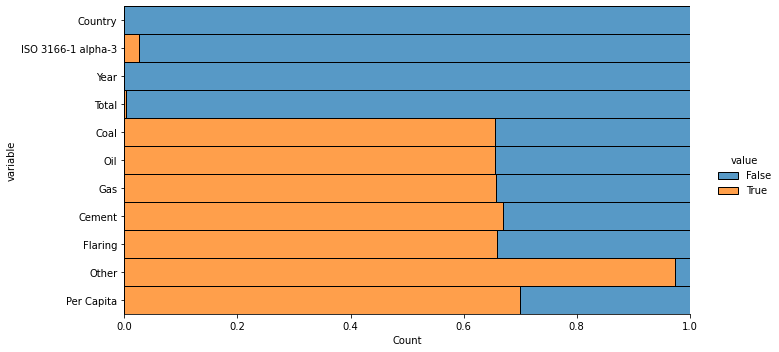

In [158]:
(
    df.
    isnull().
    melt().
    pipe(
        lambda df:(
            sns.displot(data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2
        )
    )
 )
)

Validemos los estadisticos basicos para entender aun mas nuestro dataframe

In [159]:
df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


In [160]:
df.head(5)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


EDA Variables categoricas

In [162]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (11, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

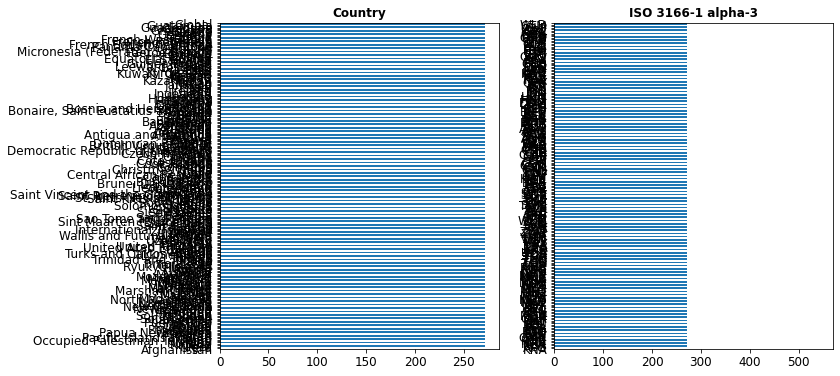

In [163]:
graficos_eda_categoricos(df.select_dtypes('O'))

La parte categorica no nos indica nada, ya que la base de datos es un resumen por fecha, es decir la frecuencia corresponde a la cantidad de veces que sale el pais o el codigo del pais segun la cantidad de fechas resumida.

EDA Variables numericas

In [164]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [165]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Year,63104.0,1885.500000,1885.500000,78.519728,1750.0,1817.750000,1885.500000,1953.250000,2021.000000
Total,62904.0,55.224788,0.000000,824.845435,0.0,0.000000,0.000000,0.549342,37123.850352
Coal,21744.0,73.968916,0.271852,598.986992,0.0,0.000000,0.271852,6.736411,15051.512770
Oil,21717.0,55.760624,1.044240,519.034563,0.0,0.091600,1.044240,8.339752,12345.653374
Gas,21618.0,23.504285,0.000000,247.674772,0.0,0.000000,0.000000,0.581628,7921.829472
Cement,20814.0,4.330443,0.022756,50.305770,0.0,0.000000,0.022756,0.568502,1672.592372
Flaring,21550.0,1.712695,0.000000,16.727067,0.0,0.000000,0.000000,0.000000,439.253991
Other,1620.0,10.951389,1.255329,39.034073,0.0,0.520885,1.255329,4.385471,306.638573
Per Capita,18974.0,4.413363,1.303949,17.432815,0.0,0.197866,1.303949,5.077994,834.192642


Logramos evidenciar que lo que mas genera CO2 es el Coal, Oil y Gas representando el 94% de todas las emisiones entre el 2002 y el 2022

## I. Preguntas de negocio

¿Cual es el pais que mas genera emisiones?